In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 🎯 QCGM Demo: Quantum Circuits for Discrete Graphical Models 
**Interactive tutorial demonstrating quantum sampling from graphical models** 
Based on [Piatkowski & Zoufal (2022)](https://arxiv.org/abs/2206.00398)

## Setup

In [28]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
plt.rcParams['figure.figsize'] = (14, 10)

# %%
from qcgm import (
    DiscreteGraphicalModel, 
    QCGMSampler, 
    QuantumCircuitBuilder,
    compute_fidelity, 
    estimate_distribution,
    compare_distributions, 
    print_comparison,
    generate_state_labels,
    visualize_graphical_model,
    visualize_circuit_diagram,
    compare_model_structures,
    plot_distribution_comparison,
    analyze_circuit_complexity,
    show_qiskit_circuit
)

print("✓ Imports successful\n")

✓ Imports successful



## Quick Start: 2-Variable Model
 
Let's sample from a simple graphical model with 2 binary variables.


### Visualize Model Structure

Creating model...
✓ Model: 2 variables, 1 clique(s)

Exact Distribution:
  P(x=00) = 0.1543
  P(x=01) = 0.3661
  P(x=10) = 0.2637
  P(x=11) = 0.2159

Visualizing model structure...


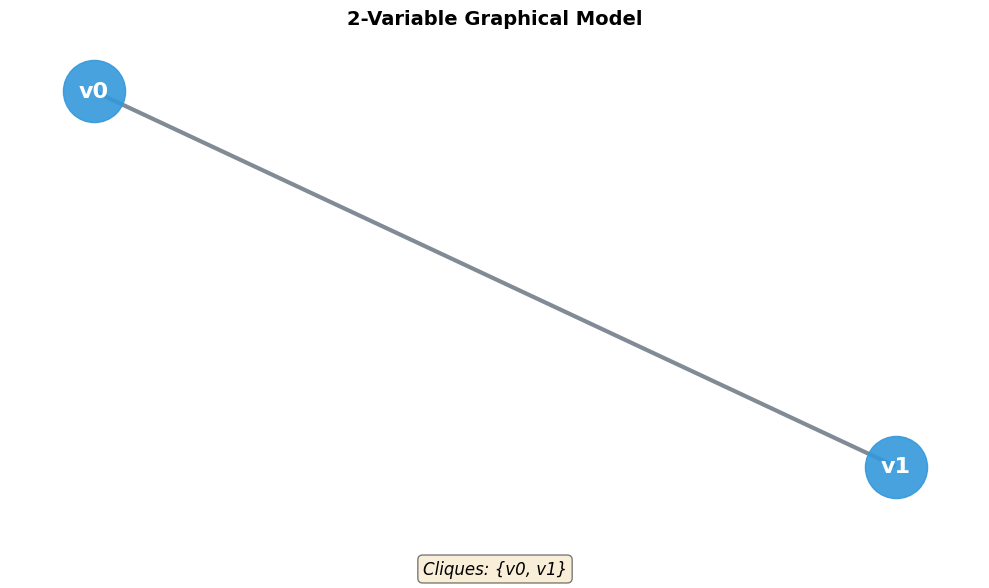

✓ Saved: model_structure_2var.png

Quantum Sampling...
✓ Collected 5000 samples (success rate: 100.0%)

Quantum Distribution:
  P̂(x=00) = 0.1562
  P̂(x=01) = 0.3570
  P̂(x=10) = 0.2684
  P̂(x=11) = 0.2184


In [29]:
print("Creating model...")

# Create model with one clique: {0, 1}
model = DiscreteGraphicalModel(n_vars=2, cliques=[{0, 1}])
model.set_random_parameters(low=-2.0, high=-0.5, seed=42)

# Get exact probabilities
exact_probs = model.compute_probabilities()
labels = generate_state_labels(2)

print(f"✓ Model: {model.n_vars} variables, {len(model.cliques)} clique(s)\n")
print("Exact Distribution:")
for label, prob in zip(labels, exact_probs):
    print(f"  P(x={label}) = {prob:.4f}")

# Visualize the 2-variable model
print("\nVisualizing model structure...")
fig = visualize_graphical_model(model, "2-Variable Graphical Model", 
                                save_path='model_structure_2var.png')
plt.show()
print("✓ Saved: model_structure_2var.png\n")

# %%
print("Quantum Sampling...")

# Create sampler and run quantum circuit
sampler = QCGMSampler(model)
samples, success_rate = sampler.sample(n_samples=5000, simplified=True)

# Estimate distribution from samples
quantum_probs = estimate_distribution(samples, n_vars=2)

print(f"✓ Collected {len(samples)} samples (success rate: {success_rate:.1%})\n")
print("Quantum Distribution:")
for label, prob in zip(labels, quantum_probs):
    print(f"  P̂(x={label}) = {prob:.4f}")

### Visualize Quantum Circuit


Visualizing quantum circuit...


C:\Users\arulr\Projects\QuantumDGM\qcgm\visualization.py:184: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  f'Circuit: {n_qubits} qubits, simplified version',


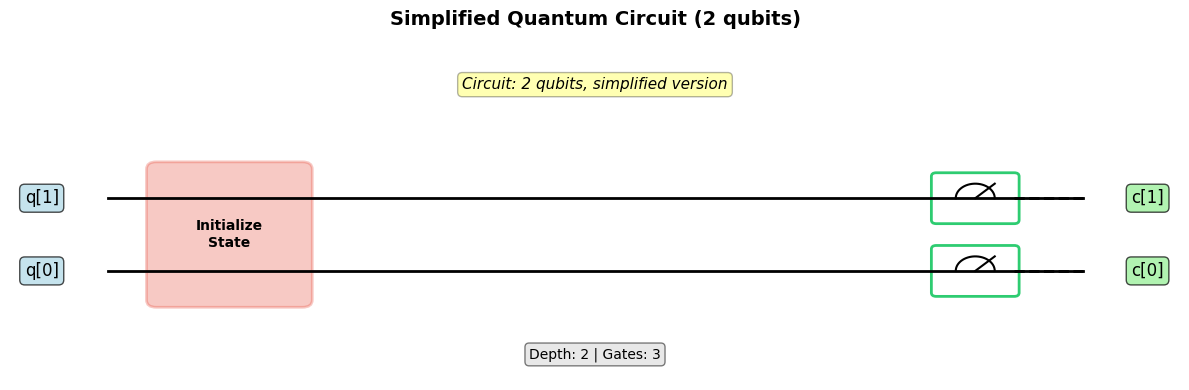

✓ Saved: circuit_diagram_2var.png


🎯 Fidelity: 0.999909
   → Excellent agreement! ✓


In [30]:
# Visualize the circuit
print("\nVisualizing quantum circuit...")
fig_circuit = visualize_circuit_diagram(model, sampler, 
                                       "Simplified Quantum Circuit (2 qubits)",
                                       save_path='circuit_diagram_2var.png')
plt.show()
print("✓ Saved: circuit_diagram_2var.png\n")

# %%
# Compare distributions
fidelity = compute_fidelity(exact_probs, quantum_probs)

print(f"\n🎯 Fidelity: {fidelity:.6f}")
if fidelity > 0.99:
    print("   → Excellent agreement! ✓")

## 📊 Visualization

✓ Saved: qcgm_quick_results.png


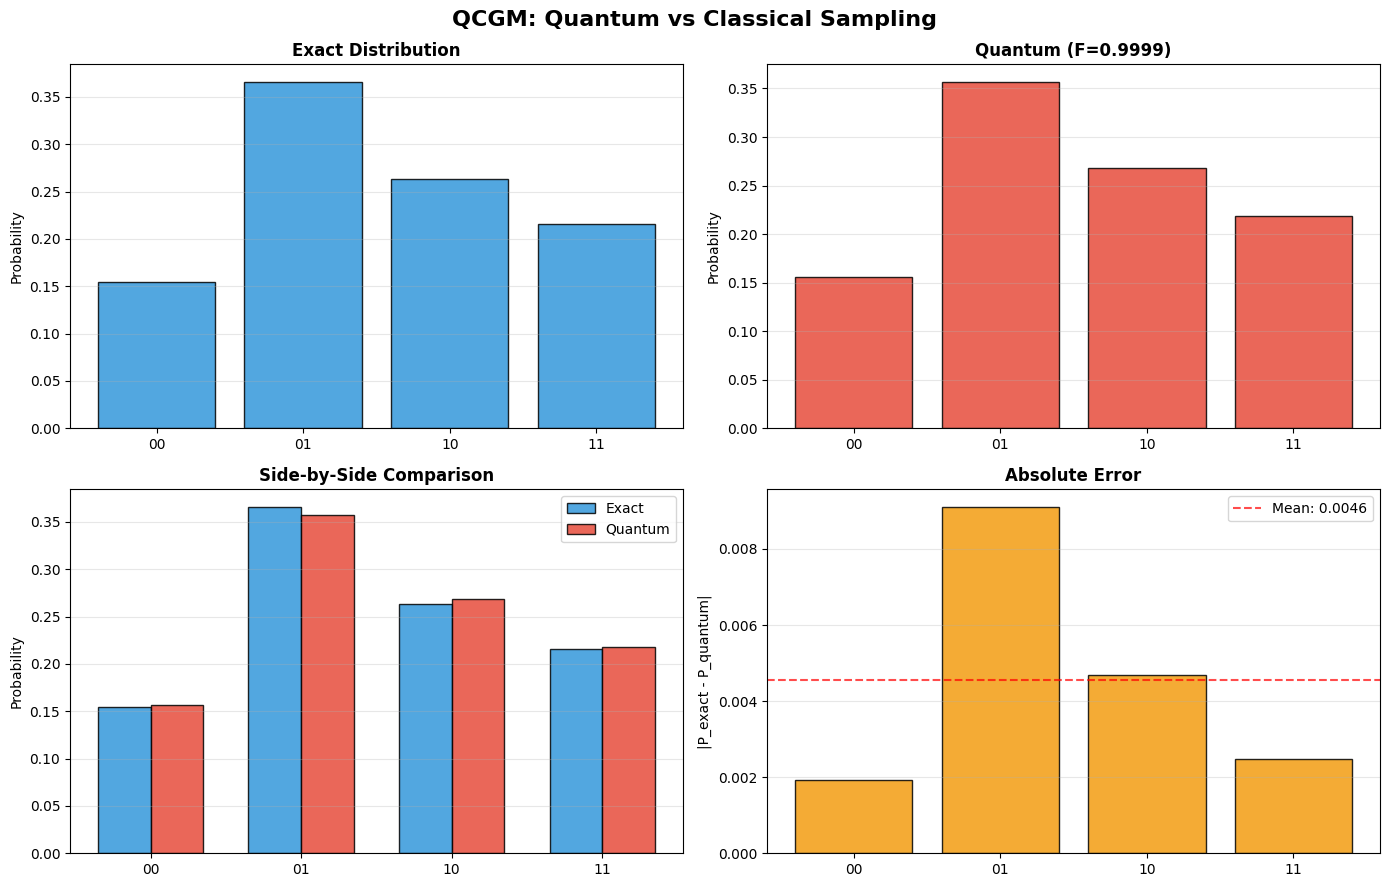

In [31]:
fig = plot_distribution_comparison(exact_probs, quantum_probs, labels, fidelity,
                                  save_path='qcgm_quick_results.png')
print("✓ Saved: qcgm_quick_results.png")
plt.show()

## 🔬 Advanced: 3-Variable Chain Model 

Chain structure: `v0 - v1 - v2`

### Visualize Chain Structure

Creating 3-variable chain model...
✓ Chain model created
  Structure: v0 - v1 - v2
  Cliques: [{0, 1}, {1, 2}]
  Entropy: 1.2634 nats

Visualizing chain structure...


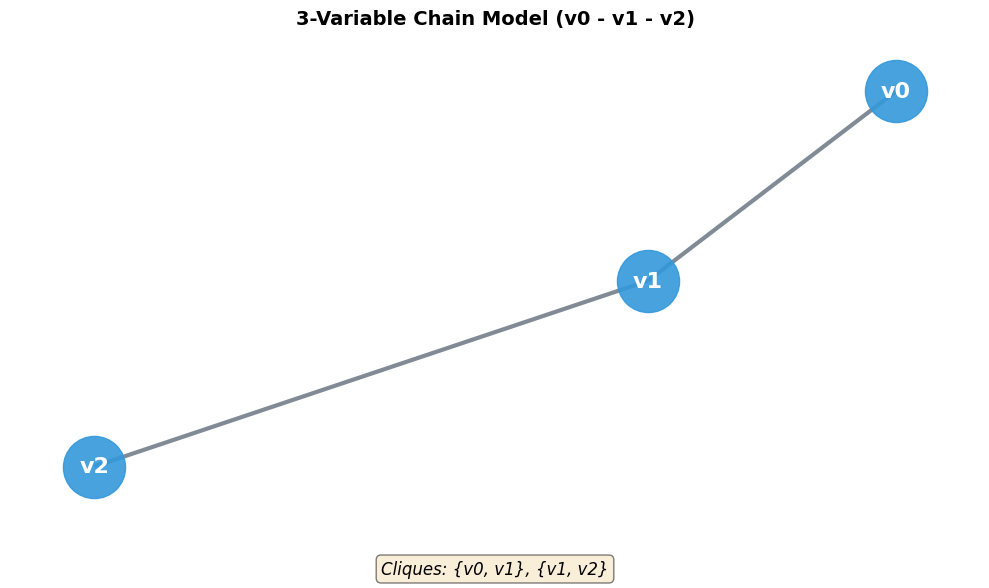

✓ Saved: model_structure_chain.png

Top 4 most probable states (exact):
  P(x=011) = 0.5974
  P(x=111) = 0.2152
  P(x=010) = 0.0573
  P(x=100) = 0.0404

Quantum sampling...
✓ Samples: 15000 (rate: 100.0%)
  Circuit depth: 2, qubits: 3

Visualizing chain circuit...


C:\Users\arulr\Projects\QuantumDGM\qcgm\visualization.py:184: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  f'Circuit: {n_qubits} qubits, simplified version',


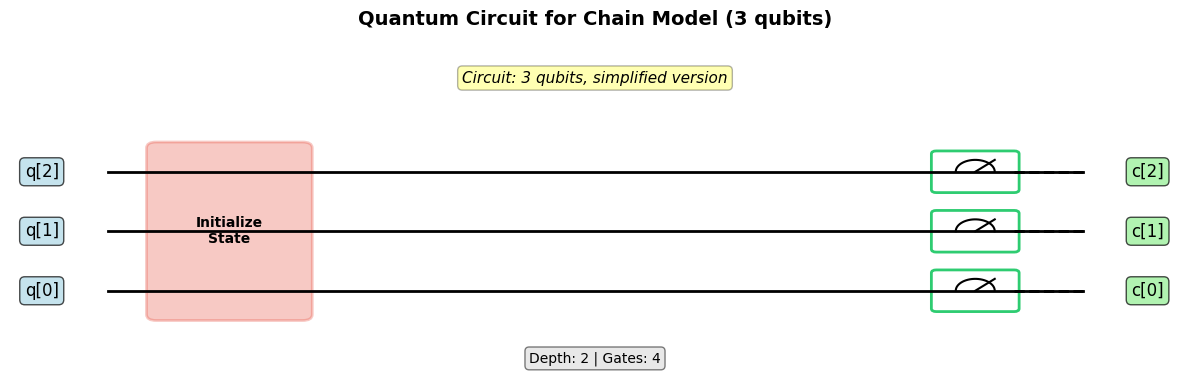

✓ Saved: circuit_diagram_chain.png

Top 4 states (quantum):
  P̂(x=011) = 0.5969
  P̂(x=111) = 0.2147
  P̂(x=010) = 0.0579
  P̂(x=100) = 0.0409

🎯 Fidelity: 0.999985


In [32]:
print("Creating 3-variable chain model...")

# Create chain: v0 - v1 - v2
model_chain = DiscreteGraphicalModel(n_vars=3, cliques=[{0, 1}, {1, 2}])
model_chain.set_random_parameters(low=-3.0, high=-0.1, seed=42)

# Properties
print(f"✓ Chain model created")
print(f"  Structure: v0 - v1 - v2")
print(f"  Cliques: {model_chain.cliques}")
print(f"  Entropy: {model_chain.compute_entropy():.4f} nats\n")

# Visualize chain structure
print("Visualizing chain structure...")
fig_chain = visualize_graphical_model(model_chain, 
                                     "3-Variable Chain Model (v0 - v1 - v2)",
                                     save_path='model_structure_chain.png')
plt.show()
print("✓ Saved: model_structure_chain.png")

# %%
# Get exact distribution
exact_chain = model_chain.compute_probabilities()
labels_chain = generate_state_labels(3)

print("\nTop 4 most probable states (exact):")
top_indices = np.argsort(exact_chain)[::-1][:4]
for i in top_indices:
    print(f"  P(x={labels_chain[i]}) = {exact_chain[i]:.4f}")

# %%
print("\nQuantum sampling...")

# Sample from chain
sampler_chain = QCGMSampler(model_chain)
samples_chain, rate_chain = sampler_chain.sample(n_samples=15000, simplified=True)

# Get circuit stats
stats = sampler_chain.get_circuit_stats()

print(f"✓ Samples: {len(samples_chain)} (rate: {rate_chain:.1%})")
print(f"  Circuit depth: {stats['depth']}, qubits: {stats['num_qubits']}\n")

# Visualize chain circuit
print("Visualizing chain circuit...")
fig_chain_circuit = visualize_circuit_diagram(model_chain, sampler_chain,
                                             "Quantum Circuit for Chain Model (3 qubits)",
                                             save_path='circuit_diagram_chain.png')
plt.show()
print("✓ Saved: circuit_diagram_chain.png")

# %%
# Estimate and compare
quantum_chain = estimate_distribution(samples_chain, n_vars=3)

print("\nTop 4 states (quantum):")
for i in top_indices:
    print(f"  P̂(x={labels_chain[i]}) = {quantum_chain[i]:.4f}")

fidelity_chain = compute_fidelity(exact_chain, quantum_chain)
print(f"\n🎯 Fidelity: {fidelity_chain:.6f}")

### Comprehensive Metrics

In [33]:
metrics_chain = compare_distributions(exact_chain, quantum_chain,
                                     labels=('Exact', 'Quantum'))
print_comparison(metrics_chain)

Distribution Comparison: Exact vs Quantum
Fidelity (F):              0.999985
Hellinger distance (H):    0.002712
KL divergence (KL):        0.000029
Total variation (TV):      0.002008
Max absolute error:        0.000676
Mean absolute error:       0.000502


### Compare Different Model Structures

Comparing different model structures...


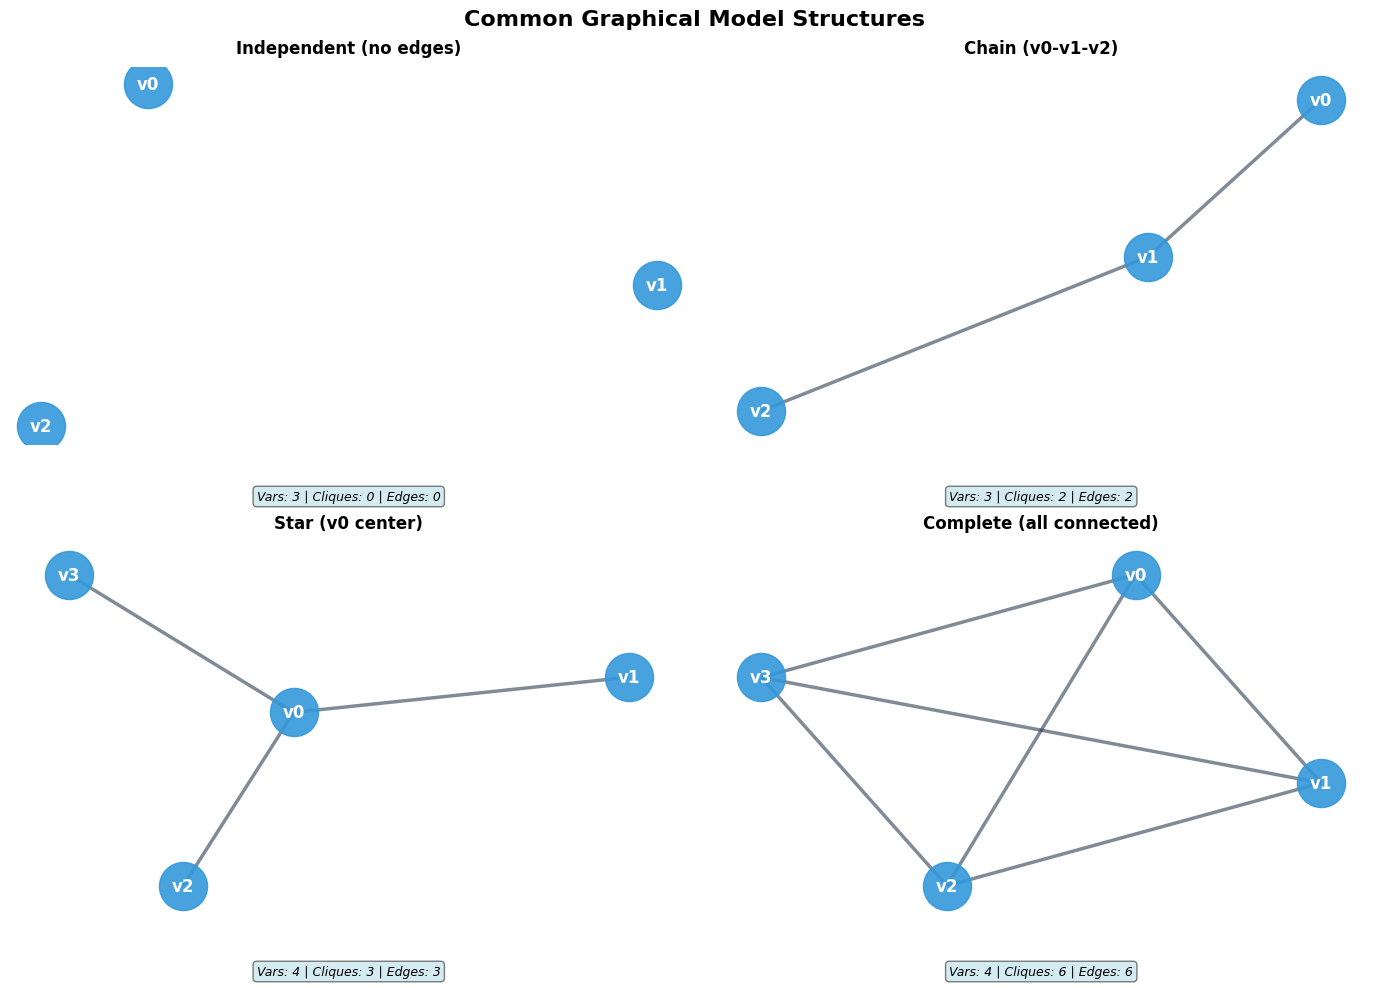

✓ Saved: model_structures_comparison.png



In [34]:
print("Comparing different model structures...")
fig_compare = compare_model_structures(save_path='model_structures_comparison.png')
plt.show()
print("✓ Saved: model_structures_comparison.png\n")

### Detailed Qiskit Circuit View

In [35]:
circuit_detailed = show_qiskit_circuit(model, max_gates=100, 
                                      save_path='qiskit_circuit_detailed.png')


Generating actual Qiskit circuit...

✓ Circuit built
  Qubits: 2
  Classical bits: 2
  Depth: 2
  Gates: 3

⚠ Could not draw circuit: "The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'."
  Circuit object is available as return value


### Circuit Analysis & Comparison


Analyzing circuit complexity...


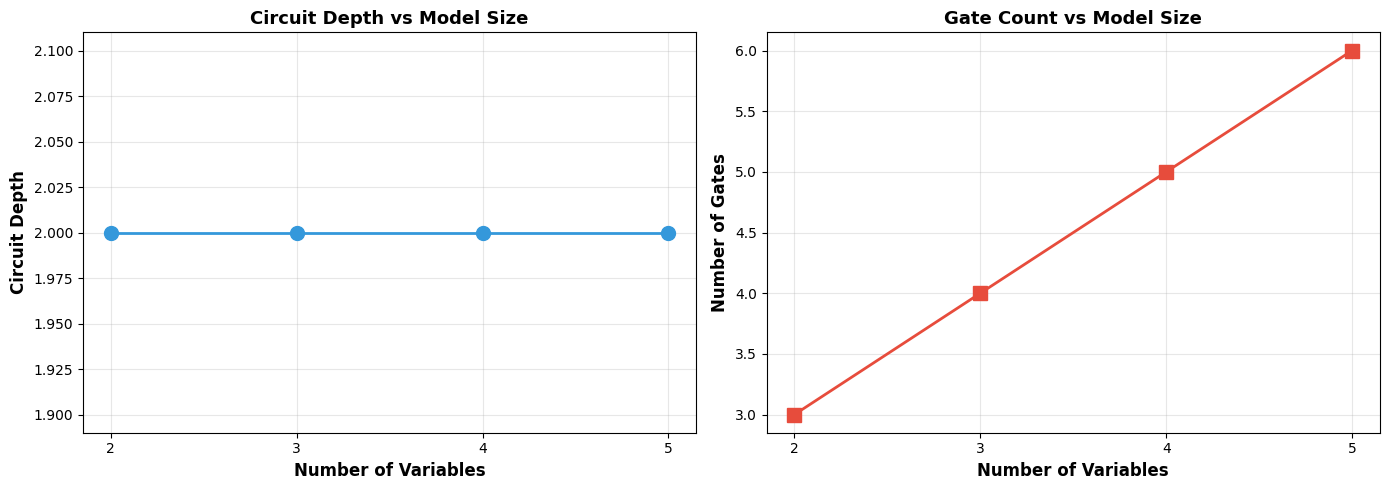

✓ Saved: circuit_complexity_analysis.png


In [36]:
print("\nAnalyzing circuit complexity...")
fig_complexity = analyze_circuit_complexity(max_vars=5, 
                                           save_path='circuit_complexity_analysis.png')
plt.show()
print("✓ Saved: circuit_complexity_analysis.png")

### Sample with Automatic Retry

In [38]:
print("Using sample_with_retry()...")

samples_retry, info = sampler.sample_with_retry(
    target_samples=500,
    max_shots=10000
)

print(f"\n✓ Target: {info['actual_samples']}/500 samples")
print(f"  Attempts: {info['attempts']}")
print(f"  Total shots: {info['total_shots']}")
print(f"  Success rate: {info['final_success_rate']:.1%}")

Using sample_with_retry()...


TypeError: descriptor '_fields' for 'Options' objects doesn't apply to a 'Options' object

### Circuit Analysis

In [39]:
print("Circuit Statistics:")
print("=" * 50)
for key, value in stats.items():
    print(f"  {key:20s}: {value}")

Circuit Statistics:


NameError: name 'stats' is not defined

## 🌐 Running on Real Quantum Hardware (IBM Quantum)

Let's run our model on actual IBM quantum computers!

### Setup IBM Quantum Account
 
First, you need an IBM Quantum account:
1. Go to https://quantum.ibm.com/
2. Create a free account
3. Get your API token from your account settings
4. Save it using the code below (only need to do this once)

In [40]:
# %%
# Uncomment and run once to save your token:
# from qiskit_ibm_runtime import QiskitRuntimeService
# 
# QiskitRuntimeService.save_account(
#     channel="ibm_quantum",
#     token="YOUR_IBM_QUANTUM_TOKEN_HERE",
#     overwrite=True
# )
# 
# print("✓ IBM Quantum account saved!")

# %% [markdown]
# ### List Available Backends

# %%
from qiskit_ibm_runtime import QiskitRuntimeService

# Load your saved account
service = QiskitRuntimeService(channel="ibm_quantum")

# List available backends
print("Available IBM Quantum Backends:")
print("=" * 70)

backends = service.backends()
for backend in backends:
    config = backend.configuration()
    status = backend.status()
    
    print(f"\n{backend.name}")
    print(f"  Qubits: {config.n_qubits}")
    print(f"  Operational: {status.operational}")
    print(f"  Pending jobs: {status.pending_jobs}")
    
    # Show if it's a simulator or real device
    if hasattr(config, 'simulator'):
        device_type = "Simulator" if config.simulator else "Real Device"
        print(f"  Type: {device_type}")

print("\n" + "=" * 70)

ImportError: cannot import name 'MeasLevel' from 'qiskit.result' (c:\Users\arulr\miniconda3\envs\qDGM\lib\site-packages\qiskit\result\__init__.py)

### Select a Backend
 
Choose an appropriate backend based on:
 - Number of qubits needed (our 2-qubit model needs ≥2 qubits)
 - Queue length (fewer pending jobs = faster)
 - Device quality (check calibration data on IBM Quantum website)


In [41]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.providers.jobstatus import JobStatus

# Get least busy backend with enough qubits
def get_best_backend(service, min_qubits=2, simulator=False):
    """Find the best available backend."""
    backends = service.backends(
        filters=lambda x: x.configuration().n_qubits >= min_qubits
                         and x.status().operational
                         and (x.configuration().simulator == simulator)
    )
    
    if not backends:
        print(f"⚠ No available backends with {min_qubits}+ qubits")
        return None
    
    # Sort by pending jobs (least busy first)
    backends_sorted = sorted(backends, key=lambda x: x.status().pending_jobs)
    
    return backends_sorted[0]

# Get best real device
best_device = get_best_backend(service, min_qubits=2, simulator=False)

if best_device:
    print(f"✓ Selected backend: {best_device.name}")
    print(f"  Qubits: {best_device.configuration().n_qubits}")
    print(f"  Pending jobs: {best_device.status().pending_jobs}")
else:
    print("Using simulator instead...")
    best_device = get_best_backend(service, min_qubits=2, simulator=True)
    print(f"✓ Selected backend: {best_device.name}")

ImportError: cannot import name 'MeasLevel' from 'qiskit.result' (c:\Users\arulr\miniconda3\envs\qDGM\lib\site-packages\qiskit\result\__init__.py)

### Run on IBM Quantum

In [42]:
print("Running on IBM Quantum backend...")
print("=" * 70)

# Create a simple 2-qubit model for real hardware
model_ibm = DiscreteGraphicalModel(n_vars=2, cliques=[{0, 1}])
model_ibm.set_random_parameters(low=-2.0, high=-0.5, seed=123)

# Get exact probabilities for comparison
exact_ibm = model_ibm.compute_probabilities()
labels_ibm = generate_state_labels(2)

print("\nExact distribution:")
for label, prob in zip(labels_ibm, exact_ibm):
    print(f"  P(x={label}) = {prob:.4f}")

# Create sampler
sampler_ibm = QCGMSampler(model_ibm)

print(f"\nSubmitting job to {best_device.name}...")
print("⚠ Note: This may take several minutes depending on queue length!")

# Sample with IBM backend
# Use fewer shots for real hardware to save queue time
samples_ibm, success_rate_ibm = sampler_ibm.sample(
    n_samples=1000,  # Fewer shots for real hardware
    backend=best_device,
    simplified=True
)

print(f"\n✓ Job completed!")
print(f"  Backend: {best_device.name}")
print(f"  Samples collected: {len(samples_ibm)}")
print(f"  Success rate: {success_rate_ibm:.1%}")

Running on IBM Quantum backend...


TypeError: '_NoValueType' object cannot be interpreted as an integer

### Analyze Results from Real Hardware

In [43]:
# Estimate distribution from real quantum hardware
quantum_ibm = estimate_distribution(samples_ibm, n_vars=2)

print("\nQuantum distribution (from real hardware):")
for label, prob in zip(labels_ibm, quantum_ibm):
    print(f"  P̂(x={label}) = {prob:.4f}")

# Compute fidelity
fidelity_ibm = compute_fidelity(exact_ibm, quantum_ibm)

print(f"\n🎯 Fidelity: {fidelity_ibm:.6f}")

if fidelity_ibm > 0.90:
    print("   → Excellent agreement with real hardware! ✓")
elif fidelity_ibm > 0.80:
    print("   → Good agreement (noise expected on real hardware)")
else:
    print("   → Moderate agreement (hardware noise significant)")


NameError: name 'samples_ibm' is not defined

### Compare Simulator vs Real Hardware

In [44]:
# Run same model on simulator for comparison
from qiskit_aer import AerSimulator

print("Running on local simulator for comparison...")
simulator = AerSimulator()

samples_sim, _ = sampler_ibm.sample(
    n_samples=5000,
    backend=simulator,
    simplified=True
)

quantum_sim = estimate_distribution(samples_sim, n_vars=2)
fidelity_sim = compute_fidelity(exact_ibm, quantum_sim)

print(f"✓ Simulator fidelity: {fidelity_sim:.6f}")
print(f"✓ Real hardware fidelity: {fidelity_ibm:.6f}")
print(f"  Difference: {abs(fidelity_sim - fidelity_ibm):.6f}")

Running on local simulator for comparison...


TypeError: descriptor '_fields' for 'Options' objects doesn't apply to a 'Options' object

### Visualize: Simulator vs Real Hardware

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('QCGM: Simulator vs Real Quantum Hardware', 
             fontsize=16, fontweight='bold')

x = np.arange(len(labels_ibm))
width = 0.25

# Plot 1: All three distributions
axes[0].bar(x - width, exact_ibm, width, label='Exact', 
           color='#3498db', alpha=0.85, edgecolor='black')
axes[0].bar(x, quantum_sim, width, label='Simulator',
           color='#2ecc71', alpha=0.85, edgecolor='black')
axes[0].bar(x + width, quantum_ibm, width, label='IBM Hardware',
           color='#e74c3c', alpha=0.85, edgecolor='black')
axes[0].set_title('Distribution Comparison', fontweight='bold')
axes[0].set_ylabel('Probability')
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels_ibm)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Simulator error
error_sim = np.abs(exact_ibm - quantum_sim)
axes[1].bar(x, error_sim, color='#2ecc71', alpha=0.85, edgecolor='black')
axes[1].set_title(f'Simulator Error (F={fidelity_sim:.4f})', fontweight='bold')
axes[1].set_ylabel('|P_exact - P_quantum|')
axes[1].set_xticks(x)
axes[1].set_xticklabels(labels_ibm)
axes[1].grid(axis='y', alpha=0.3)
axes[1].axhline(np.mean(error_sim), color='darkgreen', linestyle='--', 
               alpha=0.7, label=f'Mean: {np.mean(error_sim):.4f}')
axes[1].legend()

# Plot 3: Real hardware error
error_ibm = np.abs(exact_ibm - quantum_ibm)
axes[2].bar(x, error_ibm, color='#e74c3c', alpha=0.85, edgecolor='black')
axes[2].set_title(f'Hardware Error (F={fidelity_ibm:.4f})', fontweight='bold')
axes[2].set_ylabel('|P_exact - P_quantum|')
axes[2].set_xticks(x)
axes[2].set_xticklabels(labels_ibm)
axes[2].grid(axis='y', alpha=0.3)
axes[2].axhline(np.mean(error_ibm), color='darkred', linestyle='--', 
               alpha=0.7, label=f'Mean: {np.mean(error_ibm):.4f}')
axes[2].legend()

plt.tight_layout()
plt.savefig('qcgm_ibm_hardware_comparison.png', dpi=150, bbox_inches='tight')
print("✓ Saved: qcgm_ibm_hardware_comparison.png")
plt.show()


TypeError: '_NoValueType' object cannot be interpreted as an integer

Error in callback <function _draw_all_if_interactive at 0x00000257AFA1CF70> (for post_execute), with arguments args (),kwargs {}:


TypeError: no implementation found for 'numpy.dot' on types that implement __array_function__: [<class 'numpy.ndarray'>, <class 'numpy.ndarray'>]

<Figure size 1600x500 with 0 Axes>